### Step1. 選出市值前20名的ETF國內成分股

In [99]:
import importlib, data
import backtest_manager
import strategy.dollar_cost_averaging
importlib.reload(data)
importlib.reload(backtest_manager)
importlib.reload(strategy.dollar_cost_averaging)

Log in successful


<module 'strategy.dollar_cost_averaging' from '/opt/ccclub/backtest/strategy/dollar_cost_averaging.py'>

In [100]:
from data import api_table_data
# eg. etf_all_info, etf_domestic_nav, etf_domestic_list, etf_0050_constituents...
table_name = "etf_domestic_nav"
df_etf_domestic_nav = api_table_data(table_name)

In [114]:
df_sorted = df_etf_domestic_nav.sort_values(by='Market Cap',ascending=False)
all_code = df_sorted['code']

In [115]:
from backtest_manager import BacktestManager
analysis_result = []
for code in all_code:
    print(code)
    backtest = BacktestManager()
    stock_id = f"{code}.TW"
    buy_amount = 6000
    buy_date = 5
    backtest.load_data_yahoo(stock_id=stock_id)
    info = backtest.buy_period(buy_amount)
    log = backtest.run()
    analysis = backtest.analysis()
    analysis_result.append(analysis)

0050


[*********************100%%**********************]  1 of 1 completed


0056


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

00878



[*********************100%%**********************]  1 of 1 completed

00929



[*********************100%%**********************]  1 of 1 completed

00919



[*********************100%%**********************]  1 of 1 completed

00940
006208



[*********************100%%**********************]  1 of 1 completed


00713


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

00939
00881



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

00900



[*********************100%%**********************]  1 of 1 completed

00918
00692



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

00891



[*********************100%%**********************]  1 of 1 completed

00850



[*********************100%%**********************]  1 of 1 completed

00915
00923



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

00922
00934



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


00927
00733


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

00936
00892



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

00946
0052



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

00935
00701



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

00896



[*********************100%%**********************]  1 of 1 completed

00932
00930



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


00907


[*********************100%%**********************]  1 of 1 completed

00944
00905



[*********************100%%**********************]  1 of 1 completed


00731


[*********************100%%**********************]  1 of 1 completed


00921


[*********************100%%**********************]  1 of 1 completed


0055


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

00690



[*********************100%%**********************]  1 of 1 completed

00901



[*********************100%%**********************]  1 of 1 completed

00730



[*********************100%%**********************]  1 of 1 completed

00728



[*********************100%%**********************]  1 of 1 completed

00894


0051


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

00943
006203



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

00912


0053


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

00913



[*********************100%%**********************]  1 of 1 completed

0057


006204


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

00947


### Step2. 進行回測

[*********************100%%**********************]  1 of 1 completed


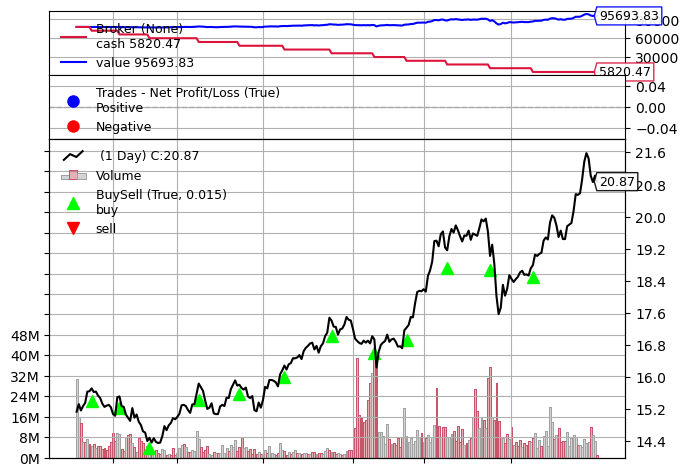

In [97]:
from backtest_manager import BacktestManager
backtest = BacktestManager()
stock_ids = "0050.TW"
buy_amount = 6000
backtest.load_data_yahoo(stock_id=stock_id)
info = backtest.buy_period(buy_amount)
log = backtest.run()
analysis = backtest.analysis()
%matplotlib inline
backtest.plot()

In [117]:
result_dict = dict(zip(all_code, analysis_result))
import pandas as pd
result = pd.DataFrame(result_dict).T
result.index.name = 'stock_id'
result_sorted = result.sort_values(by="年化報酬率(%)",ascending=False)
result_sorted

,夏普值,最大回撤(%),年化報酬率(%)
stock_id,,,
00935,1.13,8.14,40.82
00934,1.36,5.49,25.08
00923,1.54,7.46,25.05
00946,"數據長度不足, 無法計算",1.39,24.51
00927,1.8,10.23,23.34
00915,1.37,6.44,22.76
00922,1.3,6.59,22.34
00930,2.62,8.06,21.76
00905,0.97,9.1,18.62
